## Import the necessary libraries
* Import the pandas library for dataframe cleaning, manipulation, and aggregation.
* Import the numpy library for any numerical computations.
* Import the matplotlib and seaborn libraries for data visualization, and set matplotlib inline to show all the graphs in the jupyter notebook. The seaborn style darkgrid is my preferrence for graphs.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
sns.set_style('darkgrid')

#### Load the two datasets
1. The first dataset consists of the trending videos and the following information:


* Video Id
* Trending Date
* Title
* Channel title
* Category ID
* Publish time
* Tags
* Views
* Likes
* Dislikes
* Comment count
* Thumbnail link
* Comments disabled (True or False)
* Ratings disabled (True or False)
* Video error or removed (True or False)
* Description


2. The second dataset consists of the video etag and the category number and title.

In [68]:
df = pd.read_csv('Desktop/Datasets/USvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [69]:
cat_df = pd.read_json('Desktop/Datasets/US_category_id.json')
cat_df.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


### Check for Null values

In [70]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

## Data Cleaning and Adding features

### Trending date and publish date columns
Convert the date columns to the proper datetime format and extract the publish date and time.

In [5]:
df['trending_date'].unique()

array(['17.14.11', '17.15.11', '17.16.11', '17.17.11', '17.18.11',
       '17.19.11', '17.20.11', '17.21.11', '17.22.11', '17.23.11',
       '17.24.11', '17.25.11', '17.26.11', '17.27.11', '17.28.11',
       '17.29.11', '17.30.11', '17.01.12', '17.02.12', '17.03.12',
       '17.04.12', '17.05.12', '17.06.12', '17.07.12', '17.08.12',
       '17.09.12', '17.10.12', '17.11.12', '17.12.12', '17.13.12',
       '17.14.12', '17.15.12', '17.16.12', '17.17.12', '17.18.12',
       '17.19.12', '17.20.12', '17.21.12', '17.22.12', '17.23.12',
       '17.24.12', '17.25.12', '17.26.12', '17.27.12', '17.28.12',
       '17.29.12', '17.30.12', '17.31.12', '18.01.01', '18.02.01',
       '18.03.01', '18.04.01', '18.05.01', '18.06.01', '18.07.01',
       '18.08.01', '18.09.01', '18.12.01', '18.13.01', '18.14.01',
       '18.15.01', '18.16.01', '18.17.01', '18.18.01', '18.19.01',
       '18.20.01', '18.21.01', '18.22.01', '18.23.01', '18.24.01',
       '18.25.01', '18.26.01', '18.27.01', '18.28.01', '18.29.

In [6]:
df['publish_time'].unique()

array(['2017-11-13T17:13:01.000Z', '2017-11-13T07:30:00.000Z',
       '2017-11-12T19:05:24.000Z', ..., '2018-06-13T05:27:27.000Z',
       '2018-06-12T16:03:58.000Z', '2018-06-13T09:00:06.000Z'],
      dtype=object)

In [71]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

In [72]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [73]:
df['publish_date'] = df['publish_time'].dt.date

In [74]:
df['publish_hour'] = df['publish_time'].dt.hour

### Category column
The first dataset only has the category ID, and so to make this more useful I will merge the first dataset with the second dataset to get the category title based on the category ID column.

In [20]:
df['category_id'].unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43])

In [75]:
cat_df['cat_no'] = pd.to_numeric(cat_df['items'].apply(lambda x: x['id']))

In [76]:
cat_df['cat_title'] = cat_df['items'].apply(lambda x: x['snippet']['title'])

In [56]:
cat_df['cat_no'].unique()

array([ 1,  2, 10, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [77]:
cat_names = cat_df.drop(['kind', 'etag', 'items'], axis=1).copy()

In [78]:
full_df = df.merge(cat_names, left_on='category_id', right_on='cat_no')
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_hour,cat_no,cat_title
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17,22,People & Blogs
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,2017-04-21 06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,2017-04-21,6,22,People & Blogs
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,2017-11-11,15,22,People & Blogs
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11 18:08:04,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,2017-11-11,18,22,People & Blogs
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11 01:19:33,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,2017-11-11,1,22,People & Blogs


### Tag column
Add another column for the number of tags

In [62]:
full_df['tags'].unique()

array(['SHANtell martin', 'cute|"cats"|"thai"|"eggs"',
       'shawn johnson|"andrew east"|"shawn east"|"shawn and andrew"|"olympian"|"nfl player"|"athletes"|"vlog"|"couples"|"google irl"|"google feud"|"google markiplier"|"google myself"|"challenge"|"reactions"|"reacts"|"internet"|"memes"|"funny"|"birthday"|"cringe"|"laughing"|"daily"|"vlogger"|"stupid"|"cute"|"boy"|"diy"|"google"|"myself"|"googled"|"googling"|"liza"|"lizakoshy"|"wednesdays"|"liza koshy"|"googling myself"|"liza koshy net worth"|"liza koshy google"|"liza facts"|"liza panties"|"net worth"|"youtuber net worth"|"youtuber facts"',
       ...,
       'Apple|"Homepod"|"smart home"|"Google Home"|"Amazon Echo"|"Echo Dot"|"Smart speaker"|"speakers"|"Smart Home"|"Apple Byte"|"Brian Tong"|"John Kim"|"Apple Music"|"iOS"|"Google Home Max"|"Google Home Mini"|"AirPods"|"Amazon Echo Plus"|"review"|"preview"|"first look"|"hands on"|"exclusive"|"iPhone X"|"iPhone 8"|"iPhone 8 Plus"|"White"|"Space Grey"|"Siri"|"iMac"|"MacBook Pro"|"Mac Mi

In [79]:
def count_tag(x):
    return len(x.split("|"))

In [80]:
full_df['num_tags'] = full_df['tags'].apply(lambda x: count_tag(x))

### Description and title
Add another column for length of description and title

In [15]:
full_df['description'].unique()

array(["SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\\nCANDICE - https://www.lovebilly.com\\n\\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\\nwith this lens -- http://amzn.to/2rUJOmD\\nbig drone - http://tinyurl.com/h4ft3oy\\nOTHER GEAR ---  http://amzn.to/2o3GLX5\\nSony CAMERA http://amzn.to/2nOBmnv\\nOLD CAMERA; http://amzn.to/2o2cQBT\\nMAIN LENS; http://amzn.to/2od5gBJ\\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\\nWIDE LENS; http://tinyurl.com/jkfcm8t\\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\\nSMALL CAMERA; http://tinyurl.com/hrrzhor\\nMICROPHONE; http://tinyurl.com/zefm4jy\\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\\n\\nfollow me; on http://instagram.com/caseyneistat\\non https://www.facebook.com/cneistat\\non https

In [81]:
full_df[full_df['description'].isnull()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_hour,cat_no,cat_title,num_tags
71,aujUl3yt6nM,2017-11-19,Quad9 How To Install with Windows,Quad9 DNS,22,2017-11-16 01:56:43,"DNS|""privacy""|""security""",4759,40,2,...,https://i.ytimg.com/vi/aujUl3yt6nM/default.jpg,False,False,False,NaN,2017-11-16,1,22,People & Blogs,3
84,aujUl3yt6nM,2017-11-20,Quad9 How To Install with Windows,Quad9 DNS,22,2017-11-16 01:56:43,"DNS|""privacy""|""security""",5218,42,2,...,https://i.ytimg.com/vi/aujUl3yt6nM/default.jpg,False,False,False,NaN,2017-11-16,1,22,People & Blogs,3
99,aujUl3yt6nM,2017-11-21,Quad9 How To Install with Windows,Quad9 DNS,22,2017-11-16 01:56:43,"DNS|""privacy""|""security""",5963,47,2,...,https://i.ytimg.com/vi/aujUl3yt6nM/default.jpg,False,False,False,NaN,2017-11-16,1,22,People & Blogs,3
104,kKFNThEiilU,2017-11-22,Voices,Doug Jones for Senate,22,2017-11-21 02:30:47,[none],49472,430,155,...,https://i.ytimg.com/vi/kKFNThEiilU/default.jpg,False,False,False,NaN,2017-11-21,2,22,People & Blogs,1
119,kKFNThEiilU,2017-11-23,Voices,Doug Jones for Senate,22,2017-11-21 02:30:47,[none],84038,823,340,...,https://i.ytimg.com/vi/kKFNThEiilU/default.jpg,False,False,False,NaN,2017-11-21,2,22,People & Blogs,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40278,Ld57wNXddGU,2018-02-18,best pirate i've ever seen,hwow,20,2018-02-09 14:56:43,"best pirate i've ever seen|""best""|""pirate""|""i'...",205209,5147,57,...,https://i.ytimg.com/vi/Ld57wNXddGU/default.jpg,False,False,False,NaN,2018-02-09,14,20,Gaming,11
40866,ZYKUXMAou3Q,2018-02-02,Rose McGowan Shares Her Thoughts On 'Time's Up...,The View,29,2018-01-30 16:50:26,"Rose McGowan|""Rose's Army""|""MeToo""|""Time's Up""...",225051,3075,702,...,https://i.ytimg.com/vi/ZYKUXMAou3Q/default.jpg,False,False,False,NaN,2018-01-30,16,29,Nonprofits & Activism,10
40867,ZYKUXMAou3Q,2018-02-04,Rose McGowan Shares Her Thoughts On 'Time's Up...,The View,29,2018-01-30 16:50:26,"Rose McGowan|""Rose's Army""|""MeToo""|""Time's Up""...",267065,3527,769,...,https://i.ytimg.com/vi/ZYKUXMAou3Q/default.jpg,False,False,False,NaN,2018-01-30,16,29,Nonprofits & Activism,10
40868,ZYKUXMAou3Q,2018-02-05,Rose McGowan Shares Her Thoughts On 'Time's Up...,The View,29,2018-01-30 16:50:26,"Rose McGowan|""Rose's Army""|""MeToo""|""Time's Up""...",281983,3683,784,...,https://i.ytimg.com/vi/ZYKUXMAou3Q/default.jpg,False,False,False,NaN,2018-01-30,16,29,Nonprofits & Activism,10


There are 570 rows with null values for the description, and I have checked some of these videos to see that they do have descriptions. I will drop these rows because the dataset still has a large number of rows to work with.

In [82]:
full_df = full_df.dropna()

In [83]:
full_df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
publish_date              0
publish_hour              0
cat_no                    0
cat_title                 0
num_tags                  0
dtype: int64

In [84]:
full_df['desc_length'] = full_df['description'].apply(lambda x: len(x))

In [85]:
full_df['title_length'] = full_df['title'].apply(lambda x: len(x))

In [86]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,publish_date,publish_hour,cat_no,cat_title,num_tags,desc_length,title_length
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17,22,People & Blogs,1,1410,34
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,2017-04-21 06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,...,False,False,Kittens come out of the eggs in a Thai commerc...,2017-04-21,6,22,People & Blogs,4,102,20
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,...,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,2017-11-11,15,22,People & Blogs,44,630,75
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11 18:08:04,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,...,False,False,Molly is an god damn amazing human and she cha...,2017-11-11,18,22,People & Blogs,12,732,72
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11 01:19:33,wearing online dollar store makeup for a week|...,2744430,115426,1110,...,False,False,I found this online dollar store called ShopMi...,2017-11-11,1,22,People & Blogs,25,665,45


## Data Exploration
I will look at the shape and column types of the full dataset and also visualize the data to get a better understanding.

In [87]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40379 entries, 0 to 40948
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40379 non-null  object        
 1   trending_date           40379 non-null  datetime64[ns]
 2   title                   40379 non-null  object        
 3   channel_title           40379 non-null  object        
 4   category_id             40379 non-null  int64         
 5   publish_time            40379 non-null  datetime64[ns]
 6   tags                    40379 non-null  object        
 7   views                   40379 non-null  int64         
 8   likes                   40379 non-null  int64         
 9   dislikes                40379 non-null  int64         
 10  comment_count           40379 non-null  int64         
 11  thumbnail_link          40379 non-null  object        
 12  comments_disabled       40379 non-null  bool  

In [88]:
full_df.shape

(40379, 23)

In [89]:
full_df.describe()

,category_id,views,likes,dislikes,comment_count,publish_hour,cat_no,num_tags,desc_length,title_length
count,40379.000000,4.037900e+04,4.037900e+04,4.037900e+04,4.037900e+04,40379.000000,40379.000000,40379.000000,40379.000000,40379.000000
mean,19.944253,2.370839e+06,7.461677e+04,3.508122e+03,8.287396e+03,13.778945,19.944253,19.931128,1046.041655,48.670522
std,7.594850,7.428515e+06,2.296172e+05,2.317486e+04,3.431605e+04,6.415437,7.594850,11.946460,852.164158,19.576380
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,1.000000,3.000000
25%,17.000000,2.470760e+05,5.621500e+03,2.050000e+02,6.230000e+02,10.000000,17.000000,10.000000,436.000000,34.000000
50%,24.000000,6.895970e+05,1.837100e+04,6.370000e+02,1.874000e+03,15.000000,24.000000,19.000000,842.000000,47.000000
75%,25.000000,1.834912e+06,5.567200e+04,1.948000e+03,5.787000e+03,18.000000,25.000000,29.000000,1394.500000,61.000000
max,43.000000,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06,23.000000,43.000000,69.000000,5123.000000,100.000000


### Trending date

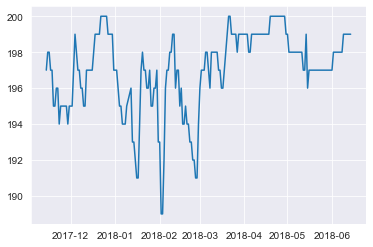

In [23]:
trend_results = full_df.groupby('trending_date')['video_id'].count()
plt.plot(trend_results);

In [24]:
trend_results.head(60)

trending_date
2017-11-14    197
2017-11-15    198
2017-11-16    198
2017-11-17    197
2017-11-18    197
2017-11-19    195
2017-11-20    195
2017-11-21    196
2017-11-22    196
2017-11-23    194
2017-11-24    195
2017-11-25    195
2017-11-26    195
2017-11-27    195
2017-11-28    195
2017-11-29    194
2017-11-30    195
2017-12-01    195
2017-12-02    195
2017-12-03    197
2017-12-04    199
2017-12-05    198
2017-12-06    197
2017-12-07    197
2017-12-08    196
2017-12-09    196
2017-12-10    195
2017-12-11    195
2017-12-12    197
2017-12-13    197
2017-12-14    197
2017-12-15    197
2017-12-16    197
2017-12-17    198
2017-12-18    199
2017-12-19    199
2017-12-20    199
2017-12-21    199
2017-12-22    200
2017-12-23    200
2017-12-24    200
2017-12-25    200
2017-12-26    200
2017-12-27    199
2017-12-28    199
2017-12-29    199
2017-12-30    199
2017-12-31    197
2018-01-01    197
2018-01-02    197
2018-01-03    196
2018-01-04    195
2018-01-05    195
2018-01-06    194
2018-01-07    

Based on the data, the trending dates of the videos are from November 2017 to June 2018. Note that there is also a drop in the number trending videos for the first three months of 2018.

### Channel Title
There are so many channels, and so I will look at the top 20 channels with most number of trending videos.

In [25]:
top_channels = full_df['channel_title'].value_counts().head(20)
top_channels

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
Netflix                                   193
TheEllenShow                              193
Vox                                       193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
CNN                                       180
Saturday Night Live                       175
WIRED                                     171
BuzzFeedVideo                             169
INSIDER                                   167
The Late Late Show with James Corden      163
TED-Ed                                    162
Tom Scott                                 159
WWE                                       157
CollegeHumor                              156
Name: channel_title, dtype: int64

In [26]:
def bar_plot(x):
    plt.figure(figsize=(12,6))
    plt.xticks(rotation=75)
    sns.barplot(x.index, x);

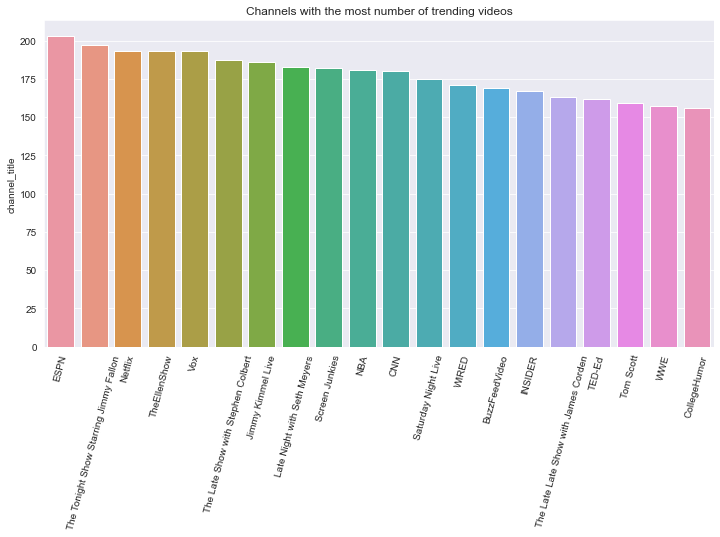

In [27]:
bar_plot(top_channels)
plt.title('Channels with the most number of trending videos');

Based on the graph, the top 20 channels with the most number of trending videos consist of entertainment, news, and sports channels. I will explore this more by checking the video categories.

### Categories

In [28]:
top_cat = full_df['cat_title'].value_counts()
top_cat

Entertainment            9819
Music                    6437
Howto & Style            4140
Comedy                   3435
People & Blogs           3061
News & Politics          2409
Science & Technology     2361
Film & Animation         2340
Sports                   2125
Education                1642
Pets & Animals            916
Gaming                    803
Travel & Events           402
Autos & Vehicles          379
Shows                      57
Nonprofits & Activism      53
Name: cat_title, dtype: int64

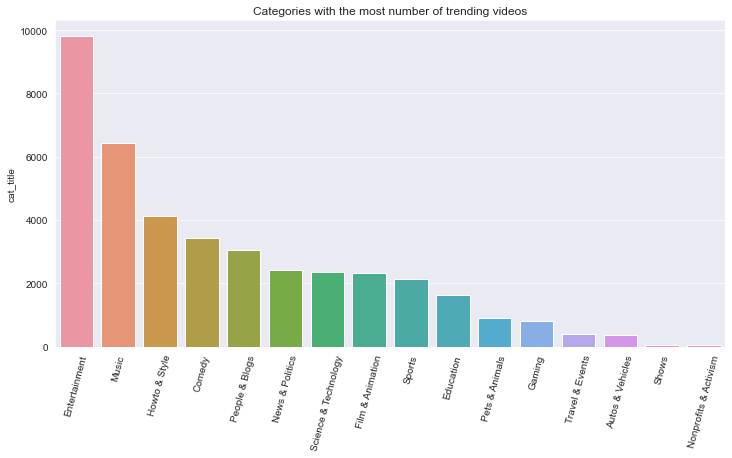

In [29]:
bar_plot(top_cat)
plt.title('Categories with the most number of trending videos');

This graph shows how imbalanced the dataset is because majority of the trending videos are in the Entertainment or Music category.

### Publish time and date

In [30]:
publish_time = full_df.groupby('publish_hour')['video_id'].count()
publish_time

publish_hour
0     1407
1     1270
2      907
3      939
4     1247
5     1248
6      509
7      700
8      790
9      605
10     538
11     835
12    1548
13    2089
14    2772
15    3432
16    3566
17    3423
18    2863
19    2073
20    2104
21    2088
22    1948
23    1478
Name: video_id, dtype: int64

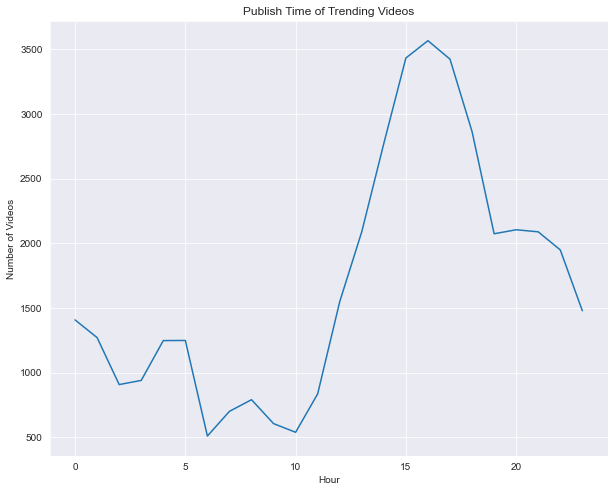

In [31]:
plt.figure(figsize=(10,8))
plt.xlabel("Hour")
plt.ylabel("Number of Videos")
plt.title("Publish Time of Trending Videos")
plt.plot(publish_time);

In [32]:
publish_date = full_df.groupby('publish_date')['video_id'].count().sort_index()
publish_date

publish_date
2006-07-23     1
2008-04-05     4
2008-06-17     4
2008-08-07     3
2009-03-10     2
              ..
2018-06-10    25
2018-06-11    36
2018-06-12    14
2018-06-13    11
2018-06-14     1
Name: video_id, Length: 303, dtype: int64

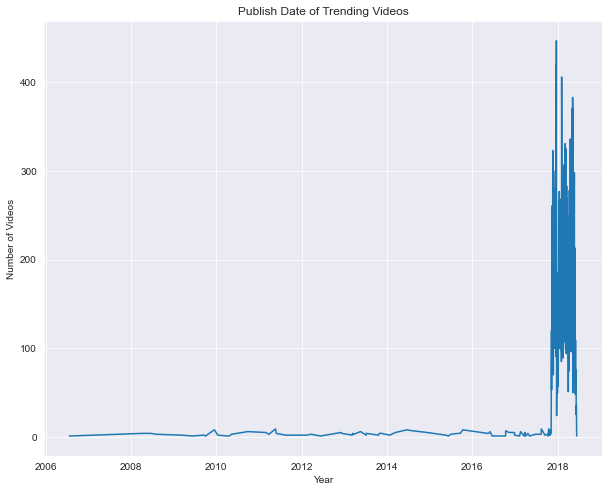

In [33]:
plt.figure(figsize=(10,8))
plt.xlabel("Year")
plt.ylabel("Number of Videos")
plt.title("Publish Date of Trending Videos")
plt.plot(publish_date);

Majority of the videos were published in 2017-2018, and so I will take a closer look at this time frame.

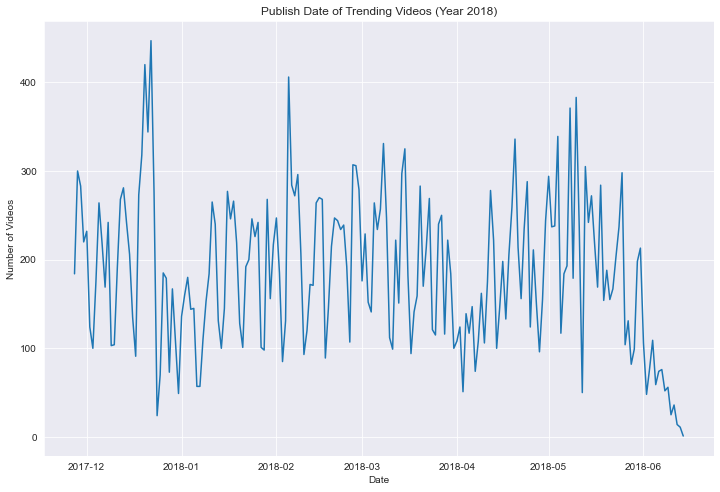

In [34]:
plt.figure(figsize=(12,8))
plt.xlabel("Date")
plt.ylabel("Number of Videos")
plt.title("Publish Date of Trending Videos (Year 2018)")
plt.plot(publish_date.tail(200));

Majority of these videos were published at 2:00 PM to 6:00 PM, and so this can mean that these hours are good times to post videos as they may have a lot of people online on Youtube.

Majority of these videos were published in 2017-2018, and based on the graph for 2018, there is a consistent trend of around 100 to 300 videos being published per month. Taking into account that the trending dates are from 2017-2018, the findings of this analysis would be more representative of Youtube videos in 2018.

## Views, likes, dislikes, number of comments, number of tags
These columns are continuous numerical values, and so I will be using seaborn's distribution plots and violinplots to visualize the median, percentile ranges, outliers, and how spread out the values are.

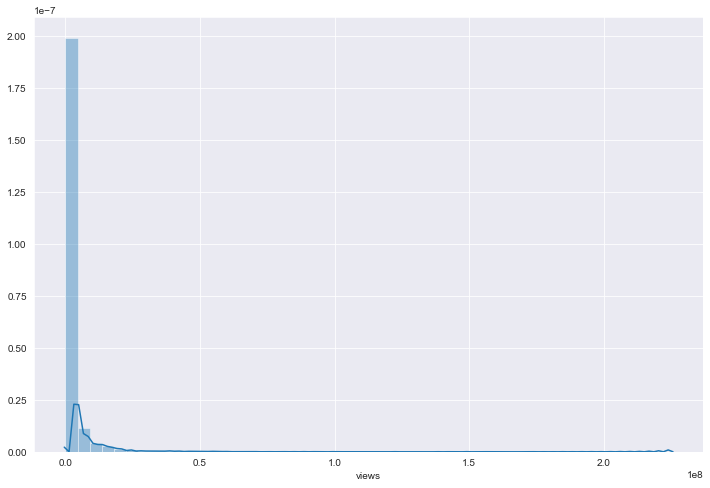

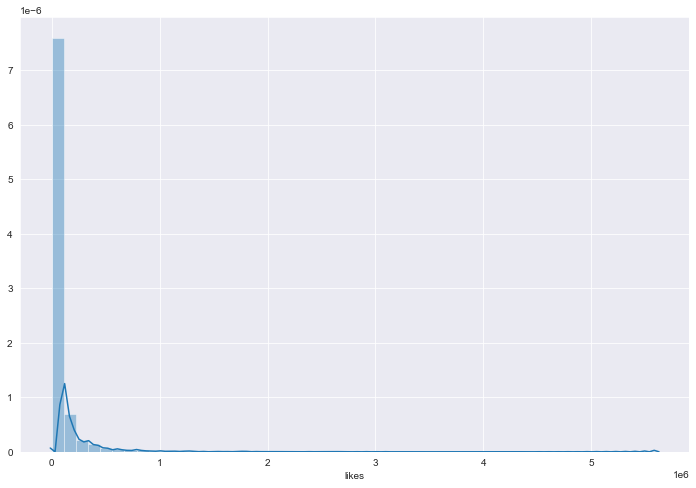

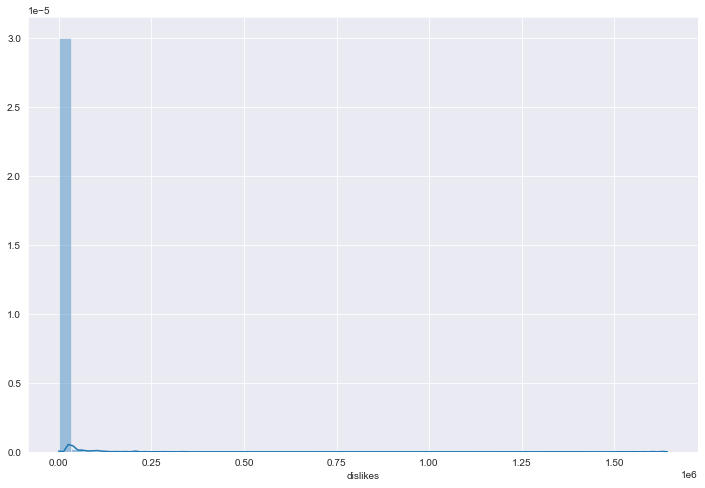

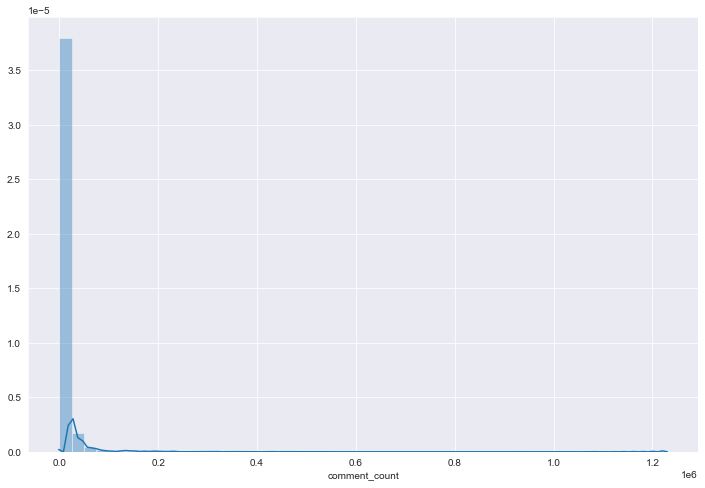

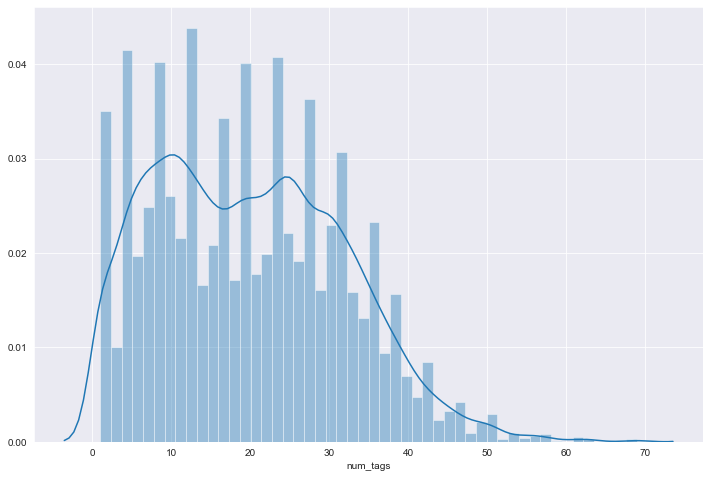

In [35]:
for col in full_df[['views', 'likes', 'dislikes', 'comment_count', 'num_tags']]:
    plt.figure(figsize=(12,8))
    sns.distplot(full_df[col])
    plt.show;

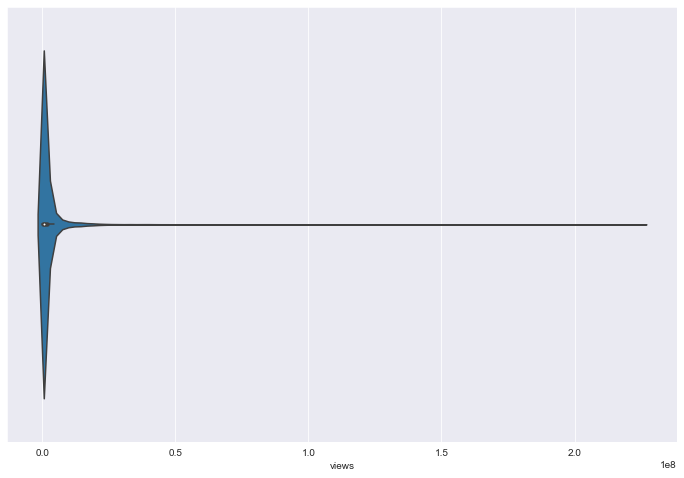

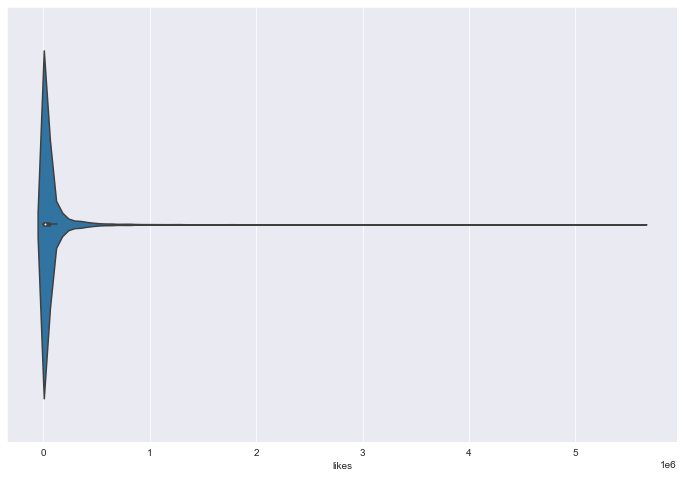

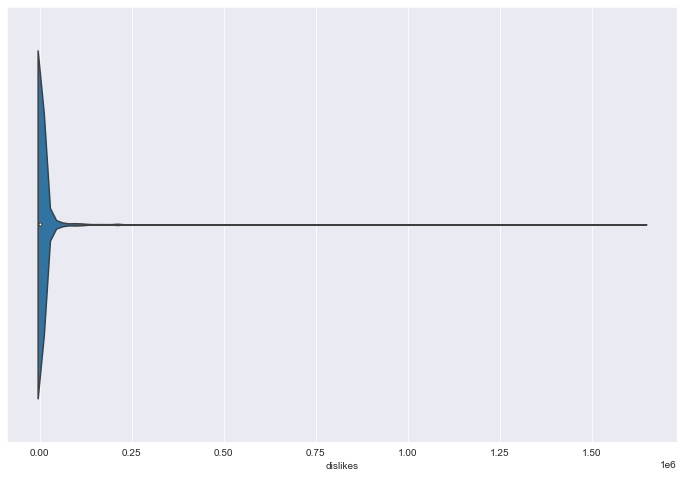

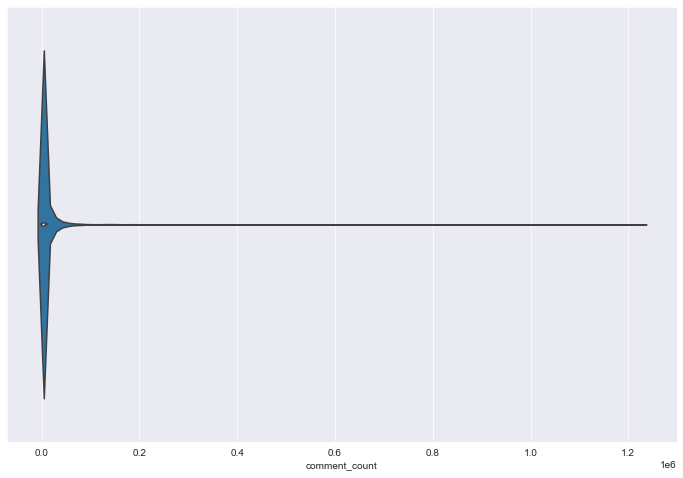

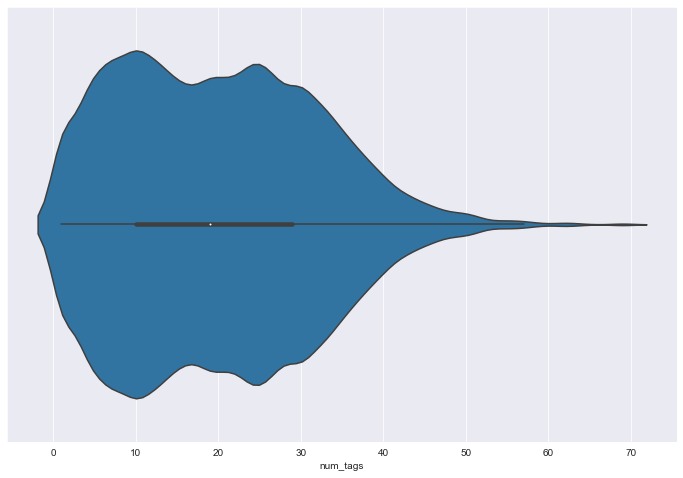

In [36]:
for col in full_df[['views', 'likes', 'dislikes', 'comment_count', 'num_tags']]:
    plt.figure(figsize=(12,8))
    sns.violinplot(full_df[col])
    plt.show;

The distribution of views, likes, dislikes, and comments are very skewed and have large standard deviations. The violinplot for the number of tags shows that the median number of tags is 19, and that most videos usually have around 5 to 30 tags.

## Comments disabled, Ratings disabled, and Video error/removed columns

In [37]:
for col in full_df[['comments_disabled', 'ratings_disabled','video_error_or_removed']]:
    print(full_df[col].value_counts())

False    39775
True       604
Name: comments_disabled, dtype: int64
False    40210
True       169
Name: ratings_disabled, dtype: int64
False    40358
True        21
Name: video_error_or_removed, dtype: int64


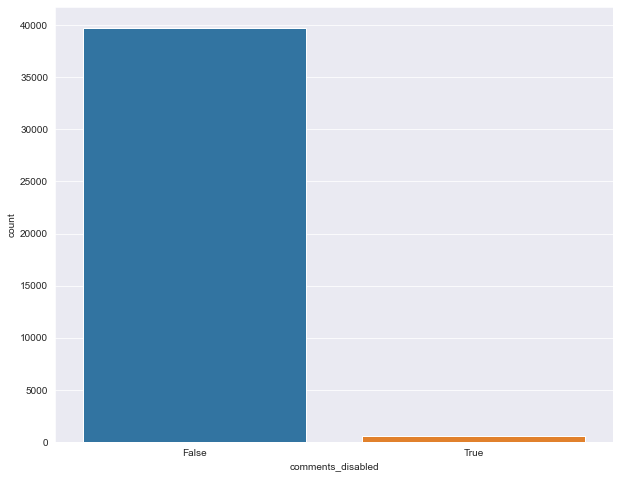

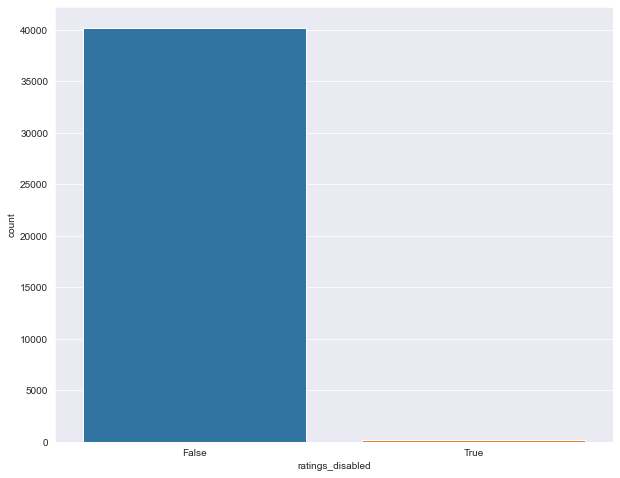

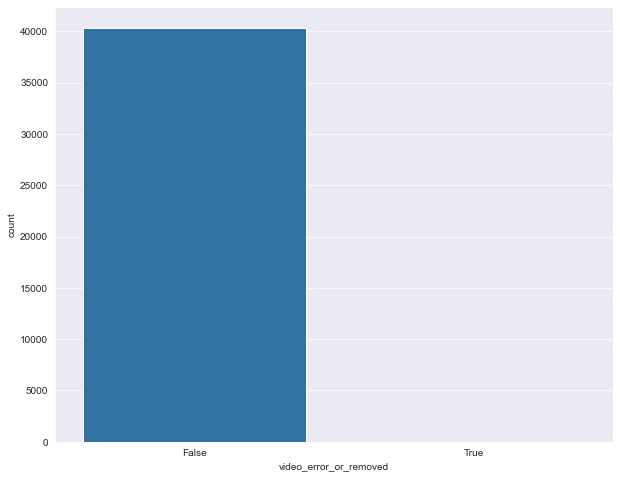

In [38]:
for col in full_df[['comments_disabled', 'ratings_disabled','video_error_or_removed']]:
    plt.figure(figsize=(10,8))
    sns.countplot(full_df[col])
    plt.show;

Majority of the trending videos do not have the comments disabled or ratings disabled as these can help lead to more likes and views. It also makes sense that very few are video errors or removed as this would make it more difficult for videos to become trending.

## Description and Title length

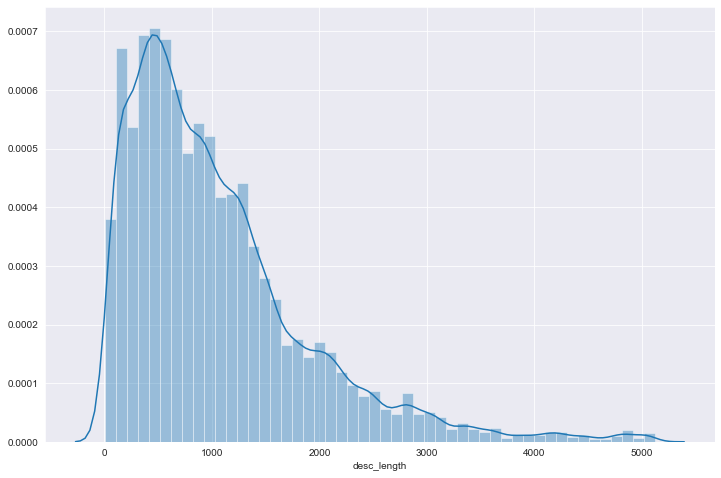

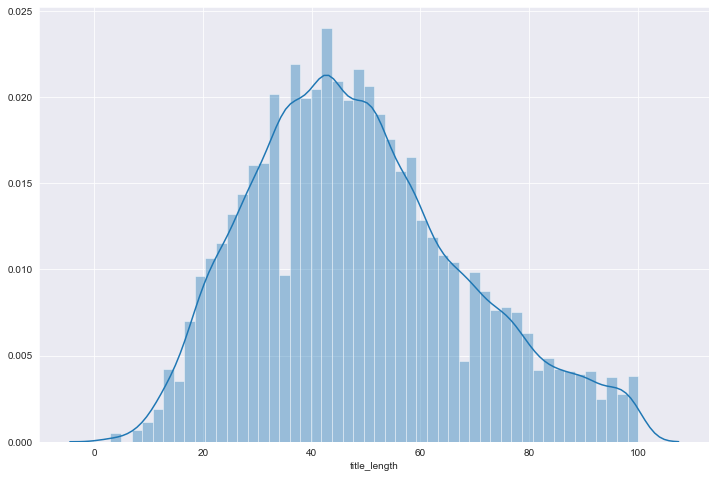

In [39]:
for col in full_df[['desc_length', 'title_length']]:
    plt.figure(figsize=(12,8))
    sns.distplot(full_df[col])
    plt.show;

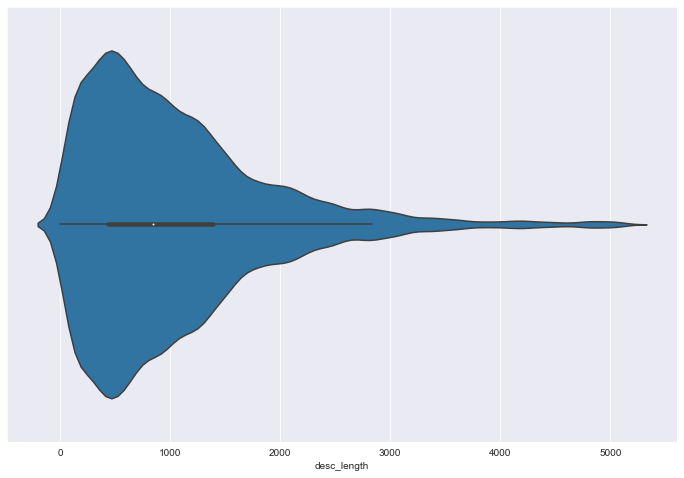

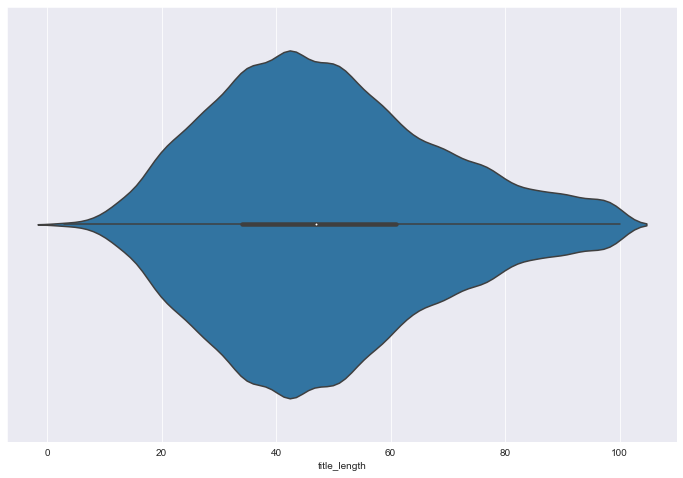

In [40]:
for col in full_df[['desc_length', 'title_length']]:
    plt.figure(figsize=(12,8))
    sns.violinplot(full_df[col])
    plt.show;

Most of the videos have a description length of around 200 to 1200 characters and a title length of around 30 to 50 characters.

## Data Analysis
### 1. Do the number of views have a correlation with the number of likes? How about the number of comments?

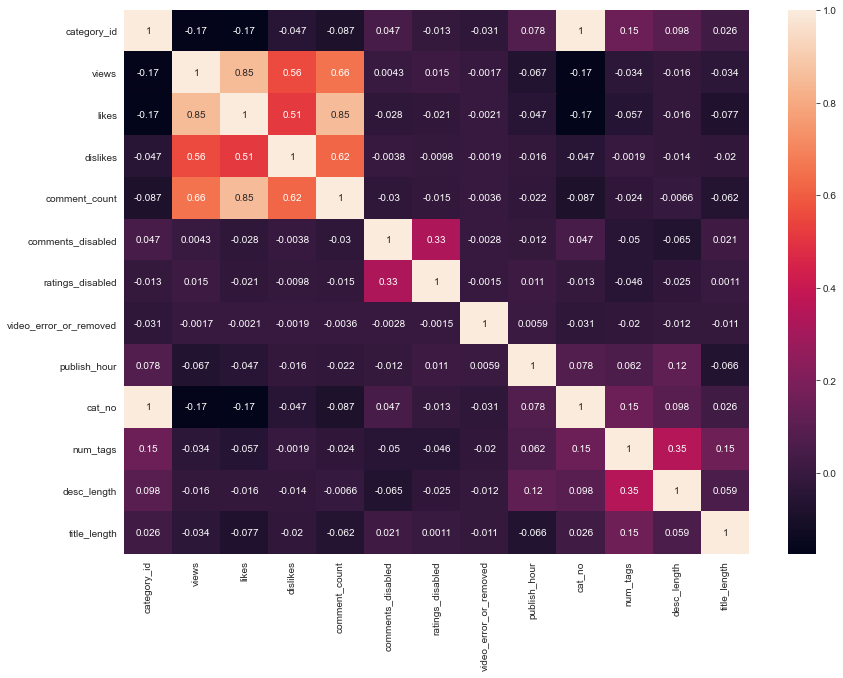

In [41]:
corr_matrix = full_df.corr()
fig = plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True);

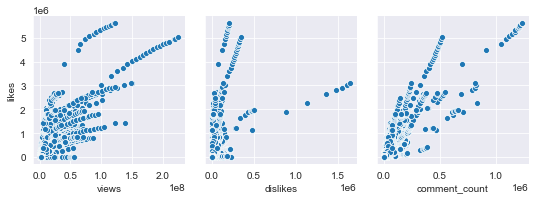

In [42]:
sns.pairplot(data=full_df,
            x_vars=['views','dislikes', 'comment_count'],
            y_vars=['likes']);

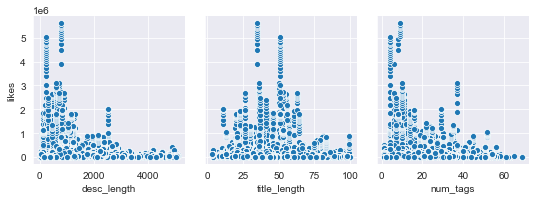

In [43]:
sns.pairplot(data=full_df,
            x_vars=['desc_length','title_length', 'num_tags'],
            y_vars=['likes']);

### Findings
There is a strong positive correlation with the number of views and comments, and the number of likes. This makes sense as the number of views and comments means more engagement, and this would lead to more opportunities to have people like the video. There is also a positive correlation with the number of dislikes and the number of likes. A reason for this can be with the increase in the number of views, likes, and comments, it will bring more people who dislike the video as well.

Based on the graph, videos with a description length of around 1000 or less have a higher number of likes, and as description length becomes longer the number of likes decreases. But it should also be noted that majority of the videos have a description length of 200 to 1200 characters, and so that would explain this. Trending videos also tend to have video titles that are around 50 characters in length, and so this would also explain why videos with title lengths of around 50 have a higher number of likes. Lastly, majority of the videos have around less than 30 tags and so this would also explain why videos with less than 30 tags have a higher number of likes.

### 2. Is there a correlation with the publish time and the number of likes and views?

In [44]:
publish_time_likes = full_df.groupby('publish_hour')['likes'].mean()
publish_time_likes

publish_hour
0      51880.724236
1      57388.731496
2      50120.547960
3      72552.294995
4     219827.103448
5      84464.929487
6      35042.618861
7      93571.610000
8      88569.640506
9     264475.476033
10     85721.098513
11     78969.473054
12     78404.071059
13     74868.417425
14     73252.994949
15     85572.026807
16     64792.053561
17     52575.594508
18     54551.042263
19     57918.290400
20     58314.457224
21     78913.731801
22     65306.722279
23     48798.501353
Name: likes, dtype: float64

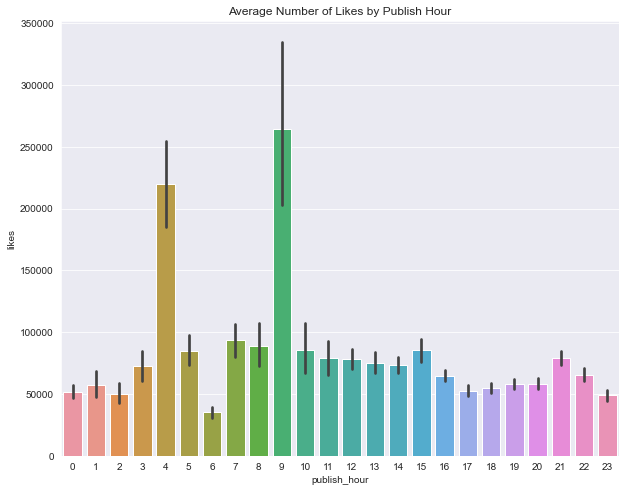

In [45]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x='publish_hour', y='likes', data=full_df)
plt.title("Average Number of Likes by Publish Hour");

There is a lot of variation in terms of the average number of likes, and so this will not be reliable. Next, I will look at the total number of likes.

In [46]:
publish_time_sumlikes = full_df.groupby('publish_hour')['likes'].sum().sort_values(ascending=False)
publish_time_sumlikes

publish_hour
15    293683196
4     274124398
16    231048463
14    203057302
17    179966260
21    164771872
9     160007663
13    156400124
18    156179634
22    127217495
20    122693618
12    121369502
19    120064616
5     105412232
0      72996179
1      72883689
23     72124185
8      69970016
3      68126605
11     65939510
7      65500127
10     46117951
2      45459337
6      17836693
Name: likes, dtype: int64

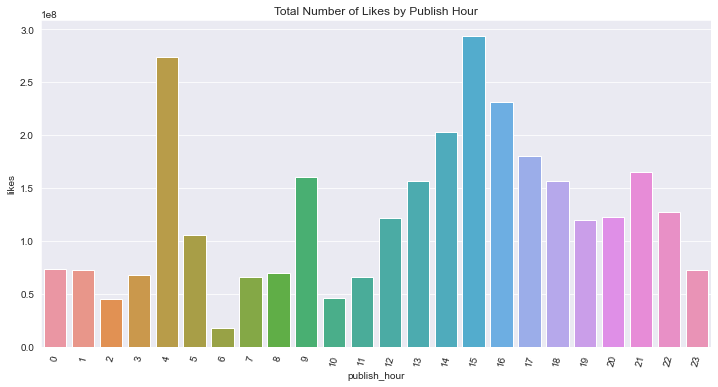

In [47]:
bar_plot(publish_time_sumlikes)
plt.title("Total Number of Likes by Publish Hour");

In [48]:
publish_time_sumviews = full_df.groupby('publish_hour')['views'].sum().sort_values(ascending=False)
publish_time_sumviews

publish_hour
4     9266728490
14    7038131378
16    6850499734
15    6741825497
13    5939531907
17    5526712862
18    5054463755
12    4829801511
21    4390035496
20    4189064046
22    3526251952
9     3477575589
5     2987836526
19    2938930280
7     2903306925
3     2722317684
8     2693147800
1     2579234108
10    2498376317
23    2475042165
11    2192339177
0     2098204224
2     1949957293
6      862781831
Name: views, dtype: int64

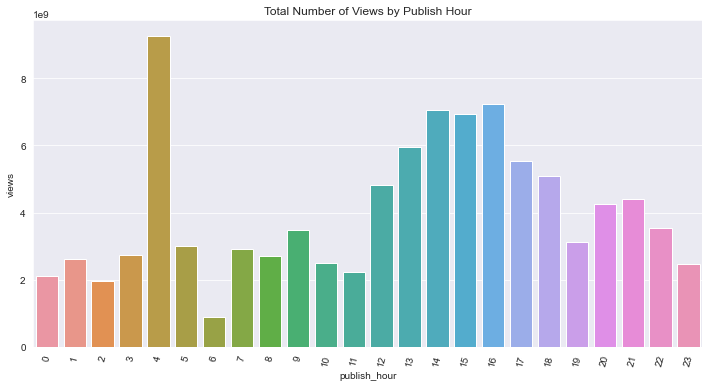

In [21]:
bar_plot(publish_time_sumviews)
plt.title("Total Number of Views by Publish Hour");

### Findings
Videos that were publish around 2:00 - 4:00 PM experienced a high number of likes and views. These times would probably have the most number of people online on Youtube. But note that there are also videos published at 4:00 AM that had large number of likes and views as well. This will need more data and research to verify.

### 3. What were the most popular topics for trending videos in specific categories?

For this analysis, I will look at the most common tags for Music, Entertainment, Gaming, and Howto & Style.

* Import the wordcloud library for visualizing the most common words in the tags column.

In [49]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

In [50]:
def plot_wordcloud(data, cat):
    comment_words = '' 
    stopwords = set(STOPWORDS) 

    # Set the tags column of the dataset as the text object 
    df_text = data[data['cat_title'] == cat]['tags']
    for val in df_text:

        # Convert each tag to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Convert each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 650, height = 650, 
                    background_color ='white', 
                    stopwords = stopwords,
                    max_words=50, min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

#### Music Category Videos

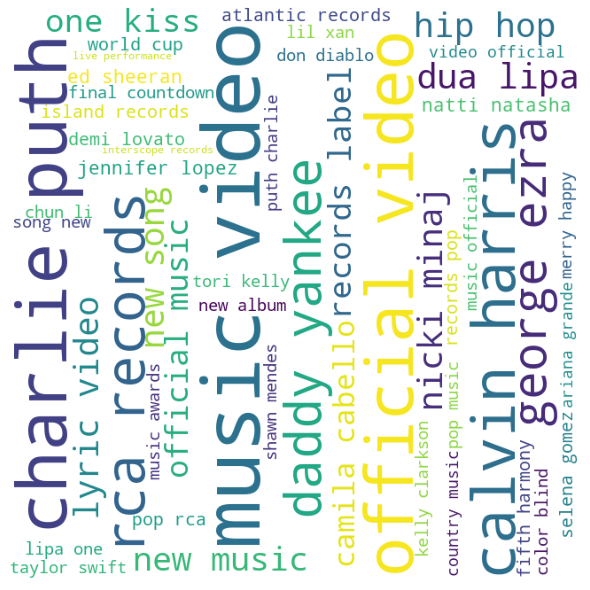

In [51]:
plot_wordcloud(full_df, 'Music')

#### Entertainment Category Videos

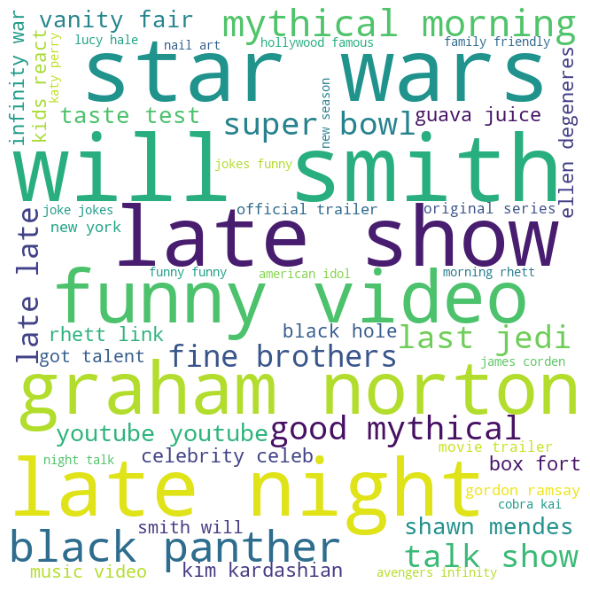

In [52]:
plot_wordcloud(full_df, 'Entertainment')

#### Gaming Category Videos

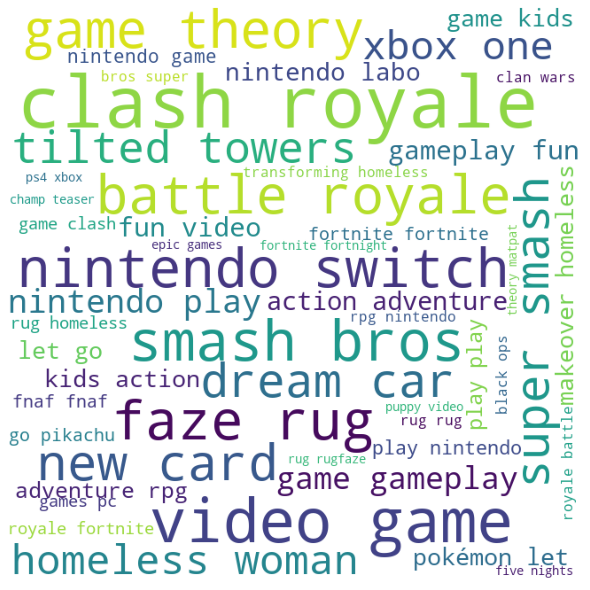

In [53]:
plot_wordcloud(full_df, 'Gaming')

#### Howto & Style Category Videos

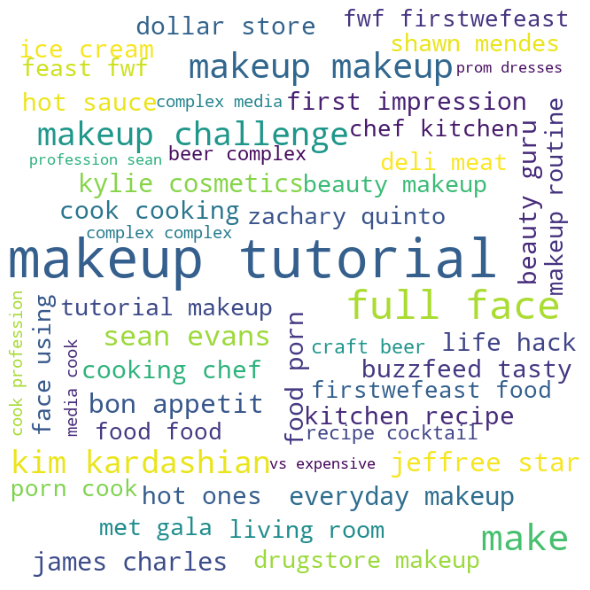

In [54]:
plot_wordcloud(full_df, 'Howto & Style')

## Findings
1. For the music category, the most popular topics consist of music video, official video, charlie puth, nicki minaj, rca records, daddy yankee, george ezra, and calvin harris.

2. For the entertainment category, the most popular topics consist of late night, late show, will smith, funny videos, graham norton, black panther, and star wars.

3. For the gaming category, the most popular topics consist of nintendo switch, battle royal, clash royale, smash bros, video game, and faze rug.

4. For the howto & style category, the most popular topics consist of make up tutorials, cooking, and food.

### 4. How long does it take a video to become trending? (Starting from publish date)

In [55]:
full_df['time_diff'] = full_df['trending_date'] - pd.to_datetime(full_df['publish_date'])

In [56]:
trend_time = full_df['time_diff'].value_counts().head(60)
trend_time

4 days       4635
3 days       4580
5 days       4518
2 days       4247
6 days       3988
7 days       3091
1 days       2805
8 days       2161
9 days       1642
10 days      1356
11 days      1185
12 days      1070
13 days       928
14 days       787
15 days       603
16 days       465
17 days       389
18 days       307
19 days       217
20 days       174
21 days       149
22 days       132
0 days        117
23 days       106
24 days        98
25 days        96
26 days        78
27 days        68
28 days        42
29 days        22
30 days         7
31 days         4
36 days         4
32 days         4
35 days         4
41 days         3
33 days         3
59 days         3
60 days         3
34 days         3
42 days         3
250 days        2
334 days        2
62 days         2
336 days        2
39 days         2
943 days        2
37 days         2
50 days         2
1878 days       2
61 days         2
40 days         2
333 days        2
3566 days       1
1709 days       1
1292 days 

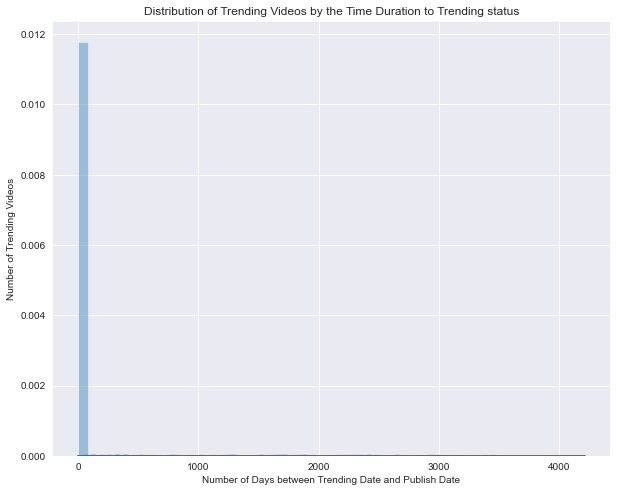

In [57]:
plt.figure(figsize=(10,8))
sns.distplot(full_df['time_diff']/ pd.Timedelta(days=1))
plt.title("Distribution of Trending Videos by the Time Duration to Trending status")
plt.xlabel("Number of Days between Trending Date and Publish Date")
plt.ylabel("Number of Trending Videos");

## Findings
Based on the data, most trending videos take around 2-6 days to become trending, and any longer than that it becomes less probable that the video will become trending. But it is also interesting to see that there are videos that became trending  even after 1000 days from the publishing date. One reason for this can be that a topic suddenly became popular later on, and this led to people searching this video topic. There can be other reasons for this as well.

### 5. What kinds of videos would lead to a higher number likes and views? How about dislikes?

In [58]:
cat_sumlikes = full_df.groupby('cat_title')['likes'].sum()
cat_sumlikes.sort_values()

cat_title
Shows                       1082639
Autos & Vehicles            4244815
Travel & Events             4836246
Nonprofits & Activism      14801539
News & Politics            17774768
Pets & Animals             19370364
Education                  49257049
Gaming                     68815520
Science & Technology       79026640
Sports                     98585569
Howto & Style             162869791
Film & Animation          165979417
People & Blogs            180510166
Comedy                    215471625
Entertainment             521186998
Music                    1409137521
Name: likes, dtype: int64

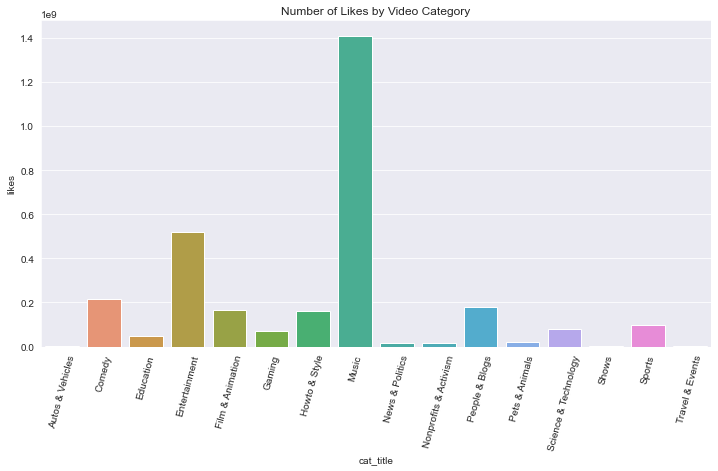

In [59]:
bar_plot(cat_sumlikes)
plt.title("Number of Likes by Video Category");

In [60]:
cat_sumviews = full_df.groupby('cat_title')['views'].sum()
cat_sumviews.sort_values()

cat_title
Shows                       51501058
Nonprofits & Activism      167872225
Travel & Events            343557084
Autos & Vehicles           520475457
Pets & Animals             764585553
Education                 1180261342
News & Politics           1447482631
Gaming                    2125888809
Science & Technology      3263200687
Howto & Style             4077720018
Sports                    4397476143
People & Blogs            4680325177
Comedy                    5097320527
Film & Animation          7282640693
Entertainment            20356044520
Music                    39975744623
Name: views, dtype: int64

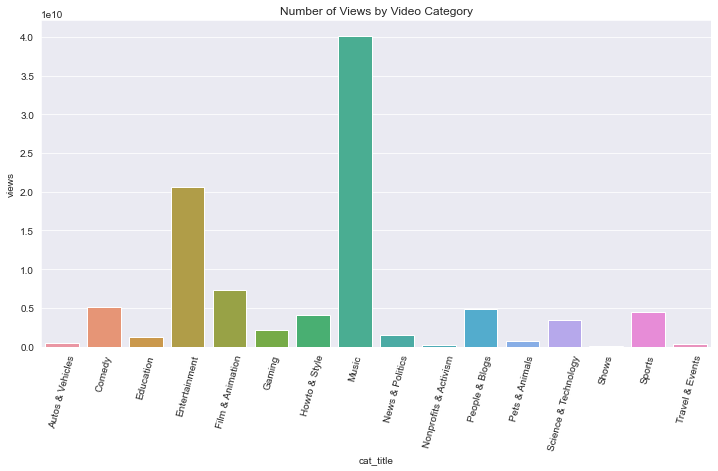

In [72]:
bar_plot(cat_sumviews)
plt.title("Number of Views by Video Category");

In [61]:
cat_sum_dislikes = full_df.groupby('cat_title')['dislikes'].sum()
cat_sum_dislikes.sort_values()

cat_title
Shows                       24508
Autos & Vehicles           242903
Travel & Events            340427
Pets & Animals             527375
Education                 1351937
Nonprofits & Activism     3307329
News & Politics           3945335
Science & Technology      4427412
Sports                    5113858
Howto & Style             5473703
Film & Animation          6074213
Comedy                    7210135
Gaming                    9170061
People & Blogs            9727106
Entertainment            33696131
Music                    51022024
Name: dislikes, dtype: int64

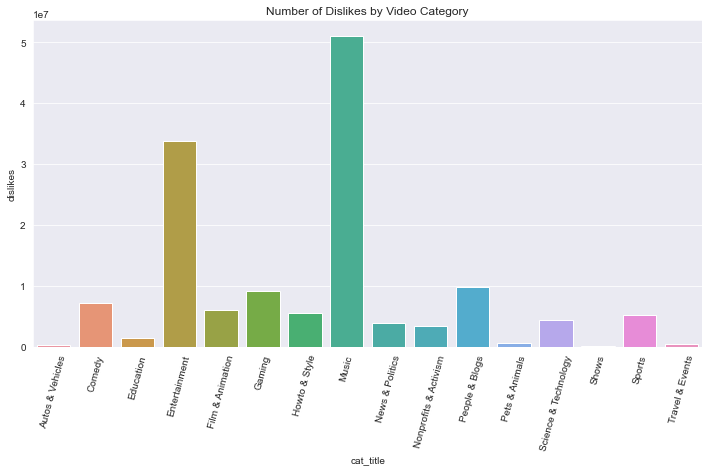

In [62]:
bar_plot(cat_sum_dislikes)
plt.title("Number of Dislikes by Video Category");

## Findings 
Based on the data, the music and entertainment category videos have the most number of likes, views and dislikes. The shows, autos & vehicles, and travel & events categories consistently have the lowest number of likes, views, and dislikes. This can help give a better understanding as to what kinds of videos are people more interested in watching. Another insight is that video categories that have a large number of likes also have a large number of dislikes. This makes sense as popular topics will bring many people with differing opinions as well.

## Conclusion of Exploratory Data Analysis

* The top channels with the most number of trending videos include ESPN, The Tonight Show Starring Jimmy Fallon and Netflix.
* In terms of the video categories, the dataset is imbalanced because majority of the videos are in either Entertainment or Music.
* Majority of these videos were published in 2017-2018, and based on the graph for 2018, there is a consistent trend of around 100 to 300 videos being published per month. Taking into account that the trending dates are from 2017-2018, the findings of this analysis would be more representative of Youtube videos in 2018.
* Majority of the trending videos do not have the comments disabled or ratings disabled as these can help lead to more likes and views. It also makes sense that very few are video errors or removed as this would make it more difficult for videos to become trending.
* There is a strong positive correlation between the number of views and comments with the number of likes. A higher number of views and comments mean more engagement, and this can lead to opportunites to get more likes. There is a correlation with the number of dislikes with the number of likes as well.
* Videos that were publish around 2:00 - 4:00 PM experienced the most number of likes. These times would probably have the most number of people online on Youtube. Note that there are also videos published at 4:00 AM that had large number of likes as well, and so this needs more research and data to verify.
* For the music category, the most popular topics consist of music video, official video, charlie puth, nicki minaj, rca records, daddy yankee, george ezra, and calvin harris. For the entertainment category, the most popular topics consist of late night, late show, will smith, funny videos, graham norton, and star wars. For the gaming category, the most popular topics consist of nintendo switch, battle royal, clash royale, smash bros, video game, and faze rug. For the howto & style category, the most popular topics consist of make up tutorials, cooking, and food.
* Most of the trending videos take around 2-6 days to become trending, and longer than that it becomes less probable that the video will become trending. BUT it is also worth noting that there are videos that became trending  even after 1000 days from the publishing date. One reason for this can be that a topic suddenly became popular later on, and this led to people searching this video topic. There can be other reasons for this as well.
* The music and entertainment category videos have the most number of likes, views, and dislikes. The shows, autos & vehicles, and travel & events categories consistently have the lowest number of likes, views, and dislikes. Based on this, we can see what videos are people more interested in watching. Video categories that have a large number of likes and views also have a large number of dislikes. This makes sense as popular topics will have many people with differing opinions as well.